In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-dataset/housing.csv


# Get the Data

_Welcome to Machine Learning Housing Corp.! Your task is to **predict median house values**#  in California districts, given a number of features from these districts._

## Download the Data

In [2]:
# fetch the data
# from pathlib import Path
# import tarfile
# import urllib.request

# def load_housing_data():
#     tarball_path = Path("datasets/housing.tgz")
#     if not tarball_path.is_file():
#         Path("datasets").mkdir(parents=True, exist_ok=True)
#         url = "https://github.com/ageron/data/raw/main/housing.tgz"
#         urllib.request.urlretrieve(url, tarball_path)
#     with tarfile.open(tarball_path) as housing_tarball:
#             housing_tarball.extractall(path="datasets")
#     return pd.read_csv(Path("datasets/housing/housing.csv"))

# housing = load_housing_data()

## Another option of getting data

In [3]:
housing = pd.read_csv("/kaggle/input/housing-dataset/housing.csv")

## Take a Quick Look at the Data Structure

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


To get the quick description of the data (total number of rows, attribute's type, and the number of non-null values):

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The "ocean_proximity" column was repetitive, meaning it is probably a categorical attribute. To find out what categories exist and how many districts belong to each category by using the value_counts() method:

In [6]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

To show the summary of the numerical attributes, we will use describe() method.

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
from pathlib import Path
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents = True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

To get a quick way to get a feel of the type of data we are dealing with is to plot a histogram for each numerical attribute. 

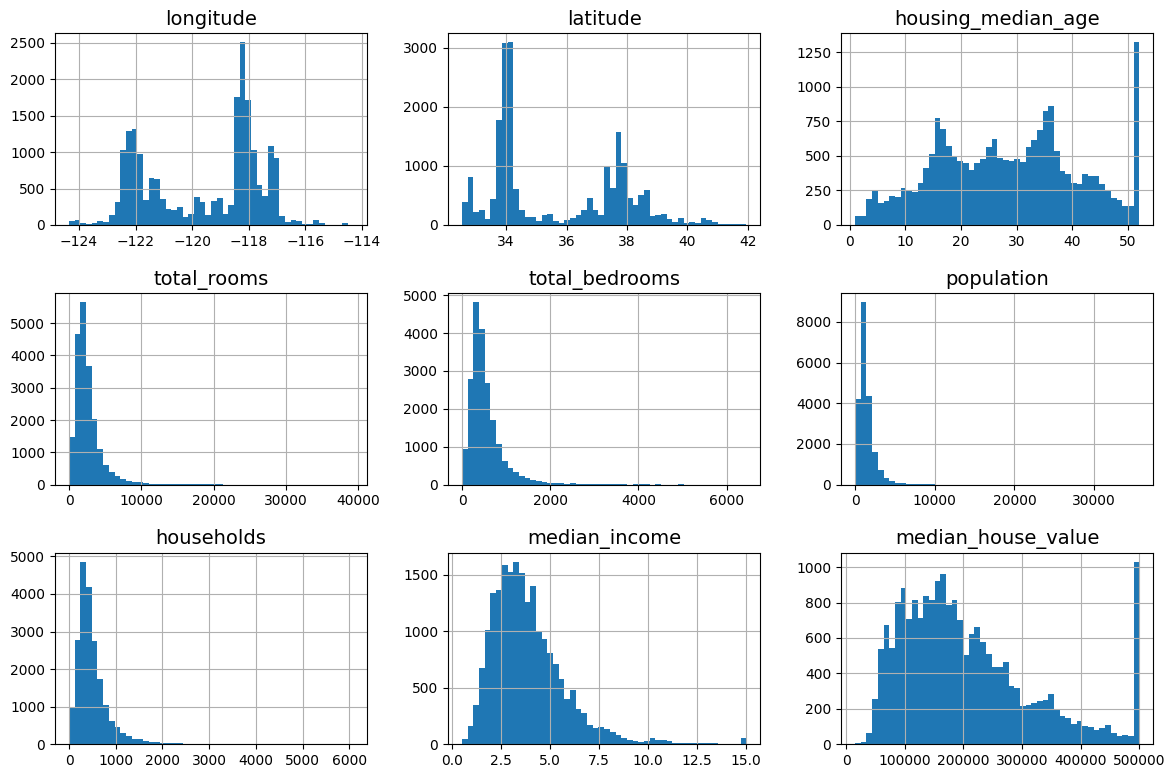

In [9]:
import matplotlib.pyplot as plt


# extra code - the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12,8))
save_fig("attribute_histogram_plots")
plt.show()

Notice a few things:

* median_income => the number represent roughly tens of thousands of dollars (e.g. 3 is about $30,000)
  
* The housing median age and the median house value were also capped. This may be a serious problem since it is our **target** attribute. The machine learning algorithms may learn that prices never go beyond that limit. We need to check with the team to see if this is a problem or not. If it need precise predictions even beyond $500k, then we have 2 options:

        1.Collect proper labels for the districts whose labels were capped.

        2.Remove those districts from the training set (and also from the test set, since the system should not be evaluated poorly if it predicts values beyond $500,000).


* The attributes have different scales.

* Many histograms are _skewed right_.

## Create a Test Set

Pick some instances randomly, typically 20% of the dataset (or less if the dataset is very large), and set them aside:

In [10]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [12]:
len(test_set)

4128

To have a stable train/test split even after updating the dataset, a common solution is to use each instance's identifier to decide whether or not it should go in the test set.

In [13]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio *2 **32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

To ensure that this notebook's output remain the same every time we run it, we need to set the random seed:

In [14]:
np.random.seed(42)

Since the housing dataset does not have an identifier column. The simplest solution is to use the row index as the ID:

In [15]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

If we want to use the **most** stable features to build a unique identifier. We can use the district's _latitude_ & _longitude_ and we can combine them into an ID like so:

In [16]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

**Scikit-Learn** provides a few functions to split datasets into multiple subsets in various ways.

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [18]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0.,1.5,3.0,4.5,6.,np.inf],
                              labels=[1,2,3,4,5])

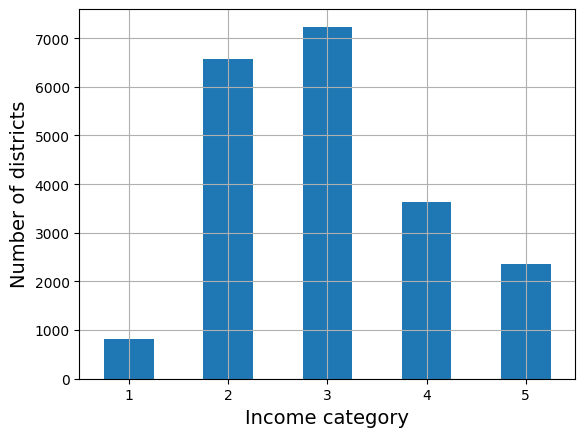

In [19]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

Having multiple splits can be useful if you want to better estimate the performance of your model, as you will see when we discuss cross-validation later in this chapter. The following code generates 10 different stratefied splits of the same dataset:

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits=[]

for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [21]:
strat_train_set, strat_test_set = strat_splits[0]

There's a shorter way to get a single split using the train_test_split() function with the stratify argument:

In [22]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"],
    random_state=42
)

Let's see if this worked as expected by start looking at the income category proportions in the test:

In [23]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [24]:
# Figure 2-10

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set)
}).sort_index()

compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"]/compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] / compare_props["Overall %"] - 1)

(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


Observation: The test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is skewed.

We won't use the income_cat column again, so we might as well drop it, reverting the data back to its original state:

In [25]:
for set_ in(strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [26]:
housing = strat_train_set.copy()

## Visualizing Geographical Data

Why visualize?

- It is because the dataset includes geographical information (latitude and longitude), it is a good idea to create a scatterplot of all the districts to visualize the data. 

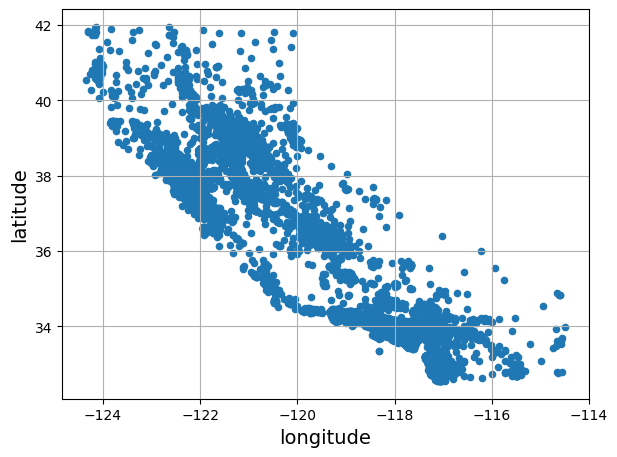

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
save_fig("bad_visualization_plot")
plt.show()

It is hard to see any particular pattern. Let's set the alpha option to 0.2 makes it much easier to visualize the places where there is a high density of data points.

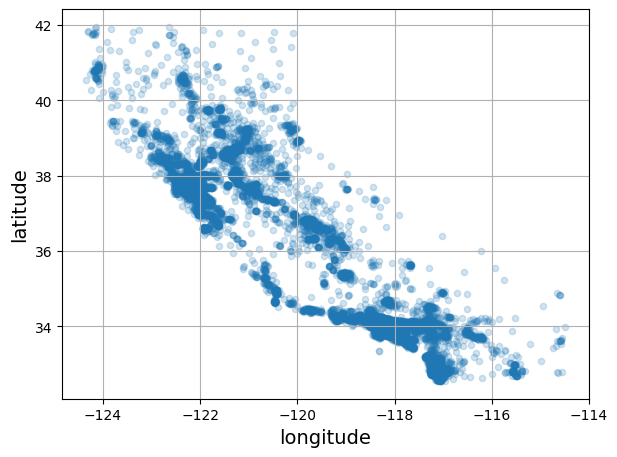

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")
plt.show()

Let's play around with visualization parameters to make the patterns stand out.

Let's look at the housing prices. The radius of each circle represents the district's population (option s), & the color represents the price (option c).

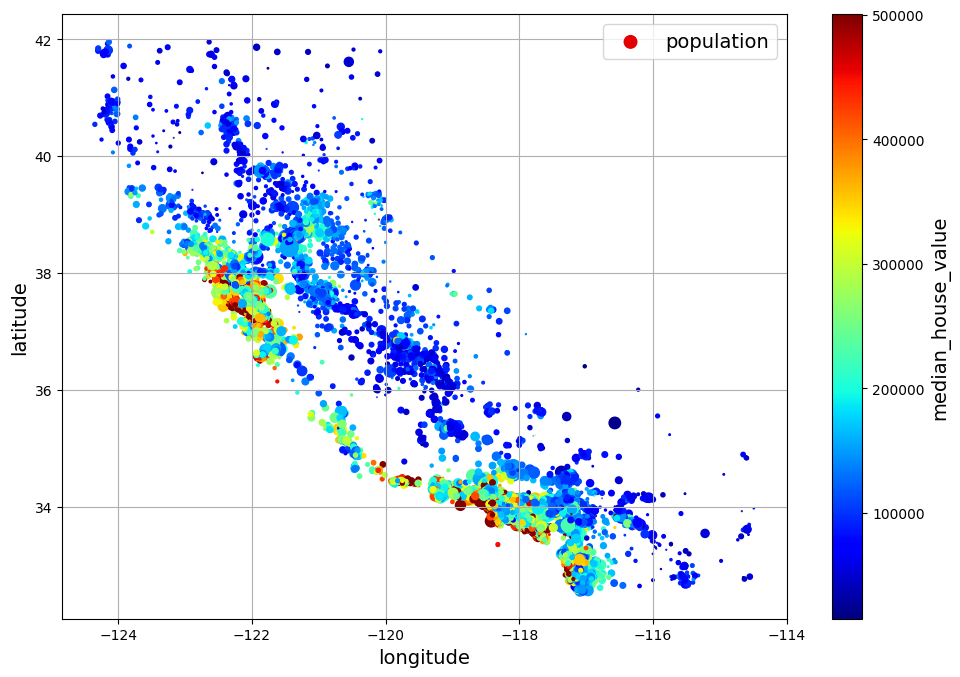

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
            s=housing["population"]/100, label="population",
            c="median_house_value", cmap="jet", colorbar=True,
            legend=True, sharex=False, figsize=(10, 7))
save_fig("housing_prices_scatterplot")
plt.show()

The next cell generates the first figure in the chapter (this code is not in the book). It's just a beautified version of the previous figure, with an image of California added in the background, nicer label names and no grid.

In [30]:
# from pathlib import Path
# import urllib.request

# # Download the California image
# filename = "california.png"
# if not (IMAGES_PATH / filename).is_file():
#     homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
#     url = homl3_root + "images/end_to_end_project/" + filename
#     print("Downloading", filename)
#     urllib.request.urlretrieve(url, IMAGES_PATH / filename)

# housing_renamed = housing.rename(columns={
#     "latitude": "Latitude", "longitude": "Longitude",
#     "population": "Population",
#     "median_house_value": "Median house value (ᴜsᴅ)"})
# housing_renamed.plot(
#              kind="scatter", x="Longitude", y="Latitude",
#              s=housing_renamed["Population"] / 100, label="Population",
#              c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
#              legend=True, sharex=False, figsize=(10, 7))

# california_img = plt.imread(IMAGES_PATH / filename)
# axis = -124.55, -113.95, 32.45, 42.05
# plt.axis(axis)
# plt.imshow(california_img, extent=axis)

# save_fig("california_housing_prices_plot")
# plt.show()

## Look for Correlations

In [31]:
corr_matrix = housing.corr(numeric_only=True)

In [32]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64